In [1]:
import os
import re
import collections
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset_location = '/home/marcin/Datasets/imdb'

In [3]:
def load_imdb_dataset(dataset_loc):
    def read_reviews(path, label, reviews, labels):
        files_list = sorted(os.listdir(path))
        for filename in sorted(os.listdir(path)):
            with open(os.path.join(path, filename)) as f:
                reviews.append(f.read())
                labels.append(label)
        return reviews, labels
    
    path_train_pos = os.path.join(dataset_location, 'aclImdb_v1/aclImdb/train/pos')
    path_train_neg = os.path.join(dataset_location, 'aclImdb_v1/aclImdb/train/neg')
    path_test_pos = os.path.join(dataset_location, 'aclImdb_v1/aclImdb/test/pos')
    path_test_neg = os.path.join(dataset_location, 'aclImdb_v1/aclImdb/test/neg')
    
    train_revs, train_labels = [], []
    train_revs, train_labels = read_reviews(path_train_pos, 1, train_revs, train_labels)
    train_revs, train_labels = read_reviews(path_train_neg, 0, train_revs, train_labels)
    
    test_revs, test_labels = [], []
    test_revs, test_labels = read_reviews(path_test_pos, 1, test_revs, test_labels)
    test_revs, test_labels = read_reviews(path_test_neg, 0, test_revs, test_labels)
    
    return (train_revs, train_labels), (test_revs, test_labels)

In [4]:
train_data, test_data = load_imdb_dataset(dataset_location)
train_reviews_raw, train_labels_raw = train_data
test_reviews_raw, test_labels_raw = test_data   

In [5]:
print(train_reviews_raw[0])

Bromwell High is a cartoon comedy. It ran at the same time as some other programs about school life, such as "Teachers". My 35 years in the teaching profession lead me to believe that Bromwell High's satire is much closer to reality than is "Teachers". The scramble to survive financially, the insightful students who can see right through their pathetic teachers' pomp, the pettiness of the whole situation, all remind me of the schools I knew and their students. When I saw the episode in which a student repeatedly tried to burn down the school, I immediately recalled ......... at .......... High. A classic line: INSPECTOR: I'm here to sack one of your teachers. STUDENT: Welcome to Bromwell High. I expect that many adults of my age think that Bromwell High is far fetched. What a pity that it isn't!


In [6]:
def count_words(list_of_examples):
    if isinstance(list_of_examples[0], str):
        split = True  # got list of strings, need to split words
    if isinstance(list_of_examples[0], list):
        split = False  # list of lists, already split by words
    
    words_counter = collections.Counter()
    for example in list_of_examples:
        if split:
            words_counter.update(example.split())
        else:
            words_counter.update(example)
            
    total_words = sum(list(words_counter.values()))
    unique_words = len(words_counter)
    
    return total_words, unique_words, words_counter

In [7]:
total_words, unique_words, words_counter = count_words(train_reviews_raw)
print('Total words: ', total_words)
print('Unique words: ', unique_words)

Total words:  5844680
Unique words:  280617


In [8]:
def plot_counts(words_counter, title):
    sorted_all = np.array(sorted(list(words_counter.values()), reverse=True))
    fig, [ax1, ax2] = plt.subplots(1, 2, figsize=[16,6])
    ax1.plot(sorted_all); ax1.set_title(title + ' Counts (linear scale)')
    ax2.plot(sorted_all); ax2.set_title(title + ' Counts (log scale)')
    ax2.set_yscale('log')

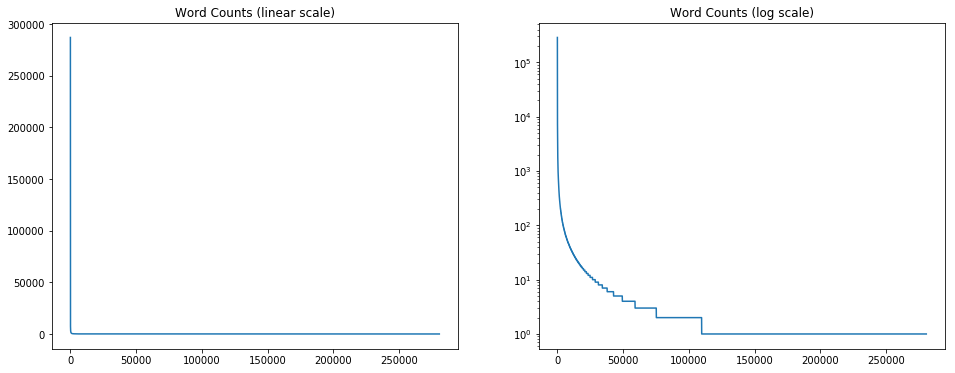

In [9]:
plot_counts(words_counter, title='Word')

# Preprocess

**Text Cleanup**

In [10]:
def text_cleanup(list_of_texts):
    """Perform text cleanup, reduce to a-z and space."""
    def cleanup(text):
        res = text.lower()
        res = regex.sub(' ', res)
        return res.split()
    
    result_cleaned = []
    regex = re.compile('[^a-z\' ]+')    # removes anything that is not a-z or space
    for text in list_of_texts:
        result_cleaned.append(cleanup(text))
    return result_cleaned                     # doubly nested list of words

In [11]:
train_reviews = text_cleanup(train_reviews_raw)
test_reviews = text_cleanup(test_reviews_raw)
print(train_reviews[0])

['bromwell', 'high', 'is', 'a', 'cartoon', 'comedy', 'it', 'ran', 'at', 'the', 'same', 'time', 'as', 'some', 'other', 'programs', 'about', 'school', 'life', 'such', 'as', 'teachers', 'my', 'years', 'in', 'the', 'teaching', 'profession', 'lead', 'me', 'to', 'believe', 'that', 'bromwell', "high's", 'satire', 'is', 'much', 'closer', 'to', 'reality', 'than', 'is', 'teachers', 'the', 'scramble', 'to', 'survive', 'financially', 'the', 'insightful', 'students', 'who', 'can', 'see', 'right', 'through', 'their', 'pathetic', "teachers'", 'pomp', 'the', 'pettiness', 'of', 'the', 'whole', 'situation', 'all', 'remind', 'me', 'of', 'the', 'schools', 'i', 'knew', 'and', 'their', 'students', 'when', 'i', 'saw', 'the', 'episode', 'in', 'which', 'a', 'student', 'repeatedly', 'tried', 'to', 'burn', 'down', 'the', 'school', 'i', 'immediately', 'recalled', 'at', 'high', 'a', 'classic', 'line', 'inspector', "i'm", 'here', 'to', 'sack', 'one', 'of', 'your', 'teachers', 'student', 'welcome', 'to', 'bromwell',

In [12]:
total_words, unique_words, words_counter = count_words(train_reviews)
print('Total words: ', total_words)
print('Unique words: ', unique_words)

Total words:  5911692
Unique words:  85680


**Remove Stopwords**

In [13]:
train_reviews_no_stop = train_reviews
test_reviews_no_stop = test_reviews

In [14]:
# display(words_counter.most_common()[:10])

In [15]:
# import nltk
# nltk.download('stopwords')
# en_stopwords = nltk.corpus.stopwords.words('english')
# stopwords = {sw for sw in en_stopwords}
# print(stopwords)
stopwords = {'down', 'then', 'of', 'but', 'only', 'yours', 'himself', 'again',
             'very', 'or', 'once', 'until', 'have', "doesn't", 'what', 'during',
             "that'll", 'some', 'was', 'be', 'he', "should've", 'between',
             "shouldn't", 'further', 'no', 'yourself', 'm', 've', "you'll",
             'ain', 't', 'our', 'his', 'o', 'wouldn', 'below', 'any', 'under',
             'you', 'isn', 'theirs', 'why', 'that', 'mightn', 'ourselves', 'on',
             'haven', 'while', 'to', 'than', 'your', 'she', 'is', 'just',
             "mightn't", 'with', "you've", 'mustn', 'needn', 'same', 'me',
             'such', 'myself', 'there', 'own', 'this', 're', 'ma', 'from',
             'did', 'couldn', 'hasn', 'for', 'won', "won't", "mustn't", 'her',
             'can', 'doesn', "wouldn't", 'when', "you're", 'who', 'which', 'll',
             'itself', 'against', 'out', 'up', "it's", 'a', 'here', 'being',
             'they', 'as', 'didn', 'weren', 'aren', 'herself', 'the', 'if',
             "didn't", 'should', 'doing', 'other', 'has', 'so', "you'd",
             'above', 'do', 'before', 'at', 'had', 'each', "aren't", 'their',
             'now', 'an', 'through', 'how', 'those', 'nor', "hasn't", 'over',
             'by', 'into', 'themselves', 'most', 'shan', 'been', "she's",
             "haven't", "isn't", "wasn't", 'where', 'about', 'in', "hadn't",
             'because', 'too', 'whom', 'ours', 'him', 'yourselves', 'after',
             'and', 'were', 'both', 'will', 'it', 'my', 'few', 'having', 'them',
             'hadn', 'shouldn', 'does', 's', "couldn't", 'y', 'all', 'don',
             'off', 'more', 'am', 'd', 'hers', 'its', 'are', "shan't",
             "weren't", 'we', "needn't", 'i', 'these', "don't", 'wasn', 'not'}

In [16]:
stopwords.add('br')  # <br /> tag in a lot of reviews

In [17]:
# def remove_stopwords(list_of_examples, stopwords):
#     result_no_stop = []
#     for list_of_words in list_of_examples:
#         result_no_stop.append( [w for w in list_of_words if w not in stopwords])
#     return result_no_stop

In [18]:
# train_reviews_no_stop = remove_stopwords(train_reviews, stopwords)
# test_reviews_no_stop = remove_stopwords(test_reviews, stopwords)

In [19]:
# print(train_reviews_no_stop[0])

In [20]:
# total_words, unique_words, words_counter = count_words(train_reviews_no_stop)
# print('Total words: ', total_words)
# print('Unique words: ', unique_words)

**Reduce Vocabulary**

In [21]:
display(words_counter.most_common()[-10:])

[("phoenix'", 1),
 ("charlotte'", 1),
 ("dynasty's'", 1),
 ('bellwood', 1),
 ('pressurized', 1),
 ("'descent'", 1),
 ("'irreversible'", 1),
 ("'inferno'", 1),
 ('whelk', 1),
 ("shite'", 1)]

In [22]:
def get_most_common_words(list_of_examples, num_words):
    words_ctr = collections.Counter()
    for example in list_of_examples:
        words_ctr.update(example)
    
    keep_words = {w for w, n in words_ctr.most_common()[:num_words]}
    return keep_words

In [23]:
allowed_words = get_most_common_words(train_reviews_no_stop, 9998)

In [24]:
print([w for w in allowed_words][:20])

['christianity', 'flashes', 'painfully', 'canvas', 'mgm', 'stated', 'mentions', 'dunne', 'term', 'greedy', 'danish', 'he', 'beaten', "who've", 'staged', 'stairs', 'simplicity', 'hit', 'factual', 'planets']


In [25]:
def reduce_vocabulary(list_of_examples, allowed_words, unk_tok='<UNK>'):
    result_reduced = []
    for example in list_of_examples:
        result_reduced.append( [w if w in allowed_words else unk_tok for w in example] )
    return result_reduced

In [26]:
train_reviews_reduced = reduce_vocabulary(train_reviews_no_stop, allowed_words)
test_reviews_reduced = reduce_vocabulary(test_reviews_no_stop, allowed_words)

In [27]:
print(train_reviews_reduced[0])

['<UNK>', 'high', 'is', 'a', 'cartoon', 'comedy', 'it', 'ran', 'at', 'the', 'same', 'time', 'as', 'some', 'other', 'programs', 'about', 'school', 'life', 'such', 'as', 'teachers', 'my', 'years', 'in', 'the', 'teaching', 'profession', 'lead', 'me', 'to', 'believe', 'that', '<UNK>', '<UNK>', 'satire', 'is', 'much', 'closer', 'to', 'reality', 'than', 'is', 'teachers', 'the', '<UNK>', 'to', 'survive', '<UNK>', 'the', 'insightful', 'students', 'who', 'can', 'see', 'right', 'through', 'their', 'pathetic', '<UNK>', '<UNK>', 'the', '<UNK>', 'of', 'the', 'whole', 'situation', 'all', 'remind', 'me', 'of', 'the', 'schools', 'i', 'knew', 'and', 'their', 'students', 'when', 'i', 'saw', 'the', 'episode', 'in', 'which', 'a', 'student', 'repeatedly', 'tried', 'to', 'burn', 'down', 'the', 'school', 'i', 'immediately', '<UNK>', 'at', 'high', 'a', 'classic', 'line', 'inspector', "i'm", 'here', 'to', 'sack', 'one', 'of', 'your', 'teachers', 'student', 'welcome', 'to', '<UNK>', 'high', 'i', 'expect', 'that

In [28]:
total_words, unique_words, words_counter = count_words(train_reviews_reduced)
print('Total words: ', total_words)
print('Unique words: ', unique_words)

Total words:  5911692
Unique words:  9999


**Create Dictionaries**

In [29]:
i2w = {i : w for i, (w, c) in enumerate(words_counter.most_common(), 1)}
w2i = {w : i for i, w in i2w.items()}
i2w[0] = '<PAD>'                       # use zero index for padding
w2i[i2w[0]] = 0
print('Number of words in dictionaries:', len(i2w))

Number of words in dictionaries: 10000


In [30]:
for i in range(10):
    word = i2w[i]
    print(i, ':', word, ':', w2i[word])

0 : <PAD> : 0
1 : the : 1
2 : <UNK> : 2
3 : and : 3
4 : a : 4
5 : of : 5
6 : to : 6
7 : is : 7
8 : br : 8
9 : in : 9


In [31]:
print(sorted(list(i2w.values()))[:100])

["'", "'a", "'cause", "'em", "'i", "'n'", "'s", "'the", '<PAD>', '<UNK>', 'a', 'aaron', 'abandon', 'abandoned', 'abc', 'abducted', 'abilities', 'ability', 'able', 'aboard', 'abominable', 'abomination', 'abortion', 'abound', 'about', 'above', 'abraham', 'abroad', 'abrupt', 'abruptly', 'absence', 'absent', 'absolute', 'absolutely', 'absorbed', 'absorbing', 'abstract', 'absurd', 'absurdity', 'abu', 'abundance', 'abuse', 'abused', 'abusive', 'abysmal', 'academic', 'academy', 'accent', 'accents', 'accept', 'acceptable', 'acceptance', 'accepted', 'accepting', 'accepts', 'access', 'accessible', 'accident', 'accidental', 'accidentally', 'acclaim', 'acclaimed', 'accompanied', 'accompany', 'accompanying', 'accomplish', 'accomplished', 'accomplishment', 'according', 'account', 'accounts', 'accuracy', 'accurate', 'accurately', 'accused', 'ace', 'achieve', 'achieved', 'achievement', 'achievements', 'achieves', 'achieving', 'acid', 'acknowledge', 'acknowledged', 'acquired', 'across', 'act', 'acted',

**Tokenize**

In [32]:
def tokenize(list_of_examples, word2idx):
    result_tokenized = []
    for list_of_words in list_of_examples:
        result_tokenized.append( [word2idx[w] for w in list_of_words] )
    return result_tokenized

In [33]:
train_reviews_tok = tokenize(train_reviews_reduced, w2i)
test_reviews_tok = tokenize(test_reviews_reduced, w2i)

In [34]:
print(train_reviews_tok[0])

[2, 309, 7, 4, 1064, 210, 10, 2135, 31, 1, 169, 56, 15, 47, 83, 5748, 42, 391, 111, 139, 15, 5261, 59, 151, 9, 1, 4922, 5821, 480, 70, 6, 262, 13, 2, 2, 1984, 7, 74, 2402, 6, 628, 72, 7, 5261, 1, 2, 6, 1985, 2, 1, 5822, 1527, 35, 68, 65, 206, 141, 66, 1221, 2, 2, 1, 2, 5, 1, 224, 896, 30, 2999, 70, 5, 1, 5749, 11, 688, 3, 66, 1527, 52, 11, 217, 1, 386, 9, 61, 4, 1459, 3666, 797, 6, 3473, 178, 1, 391, 11, 1229, 2, 31, 309, 4, 352, 343, 2949, 144, 131, 6, 7661, 29, 5, 127, 5261, 1459, 2350, 6, 2, 309, 11, 529, 13, 109, 1460, 5, 59, 550, 102, 13, 2, 309, 7, 228, 4120, 49, 4, 2211, 13, 10, 216]


In [35]:
def encode_multihot(arr_of_tokens, encode_size):
    result_encoded = np.zeros(shape=(len(arr_of_tokens), encode_size))
    for i, tokens in enumerate(arr_of_tokens):
        result_encoded[i, tokens] = 1
    return result_encoded  # numpy array

In [36]:
train_reviews_enc = encode_multihot(train_reviews_tok, encode_size=len(i2w))
test_reviews_enc = encode_multihot(test_reviews_tok, encode_size=len(i2w))

In [37]:
print(train_reviews_enc[0, :100])

[0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1.
 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0.
 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


**Convert Labels**

In [38]:
train_labels = np.array(train_labels_raw)
test_labels = np.array(test_labels_raw)

In [39]:
print(train_labels)

[1 1 1 ... 0 0 0]


# Sklearn Model

In [40]:
import sklearn.metrics
from sklearn import linear_model

In [41]:
model = linear_model.LogisticRegression(C=0.05, solver='liblinear')

In [42]:
model.fit(train_reviews_enc, train_labels)

LogisticRegression(C=0.05, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [43]:
predictions = model.predict(test_reviews_enc)

In [44]:
sklearn.metrics.accuracy_score(test_labels, predictions)

0.88128

In [45]:
raise # sentinel, don't auto-run beyond this point

RuntimeError: No active exception to reraise

**10,000 words vocab**

Reference model

In [ ]:
sklearn.metrics.accuracy_score(test_labels, predictions)

Stopwords kept in

In [ ]:
sklearn.metrics.accuracy_score(test_labels, predictions)

<div class="alert alert-success">

This is best model

Conclusions are as follows:

* use 10k vocabulary size
* keep apostrophe in words, e.g. "don't", "desn't"
* don't remove stopwords

</div>

Bot Stopwords kept in, and apostrophe kept in "'"

In [ ]:
sklearn.metrics.accuracy_score(test_labels, predictions)

Stopwords kept in, no cleanup at all (just split and tolower)

In [ ]:
sklearn.metrics.accuracy_score(test_labels, predictions)

**60,000 words vocab**

In [ ]:
sklearn.metrics.accuracy_score(test_labels, predictions)

**Ablation Study - 1000 words vocab**

Reference Model

In [ ]:
sklearn.metrics.accuracy_score(test_labels, predictions)

Cleanup - no cleanup, just tolower()

In [ ]:
sklearn.metrics.accuracy_score(test_labels, predictions)

Cleanup - keep apostrophe in "'"

In [ ]:
sklearn.metrics.accuracy_score(test_labels, predictions)

Stop-words not removed - 'a', 'an', 'the' are still in dataset

In [ ]:
sklearn.metrics.accuracy_score(test_labels, predictions)